In [2]:
pip install tensorflow


   ---------------------------------------- 0.0/375.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/375.9 MB ? eta -:--:--
   ---------------------------------------- 0.5/375.9 MB 1.3 MB/s eta 0:04:51
   ---------------------------------------- 0.8/375.9 MB 1.3 MB/s eta 0:04:51
   ---------------------------------------- 1.0/375.9 MB 1.4 MB/s eta 0:04:36
   ---------------------------------------- 1.3/375.9 MB 1.4 MB/s eta 0:04:23
   ---------------------------------------- 1.8/375.9 MB 1.6 MB/s eta 0:03:58
   ---------------------------------------- 2.4/375.9 MB 1.7 MB/s eta 0:03:40
   ---------------------------------------- 2.9/375.9 MB 1.8 MB/s eta 0:03:27
   ---------------------------------------- 3.4/375.9 MB 1.9 MB/s eta 0:03:15
   ---------------------------------------- 3.7/375.9 MB 1.9 MB/s eta 0:03:13
   ---------------------------------------- 4.5/375.9 MB 2.0 MB/s eta 0:03:02
    --------------------------------------- 5.0/375.9 MB 2.1 MB/s eta 0:03:01


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 8s 1us/step


c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 36s 19ms/step - accuracy: 0.8849 - loss: 0.3609 - val_accuracy: 0.9845 - val_loss: 0.0551
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 30s 18ms/step - accuracy: 0.9830 - loss: 0.0554 - val_accuracy: 0.9865 - val_loss: 0.0425
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 39s 23ms/step - accuracy: 0.9886 - loss: 0.0365 - val_accuracy: 0.9877 - val_loss: 0.0399
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 35s 20ms/step - accuracy: 0.9915 - loss: 0.0259 - val_accuracy: 0.9897 - val_loss: 0.0374
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 44s 26ms/step - accuracy: 0.9937 - loss: 0.0183 - val_accuracy: 0.9912 - val_loss: 0.0331
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.9864 - loss: 0.0433
Test Accuracy: 0.9890999794006348
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step


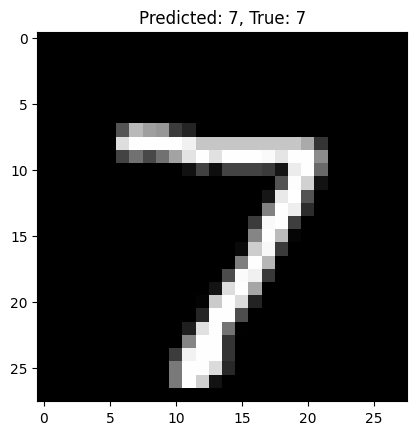

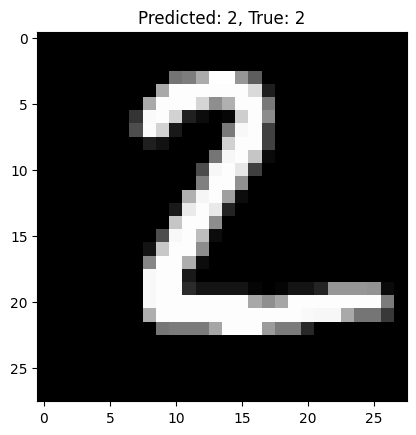

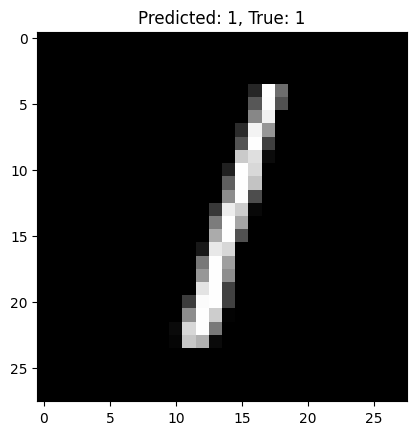

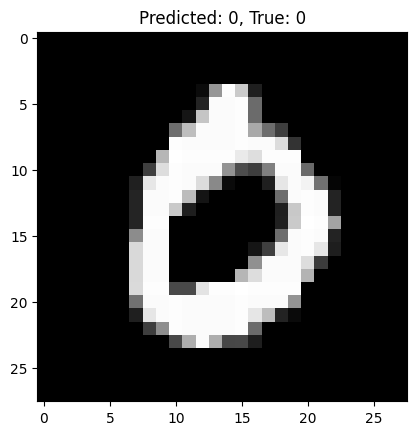

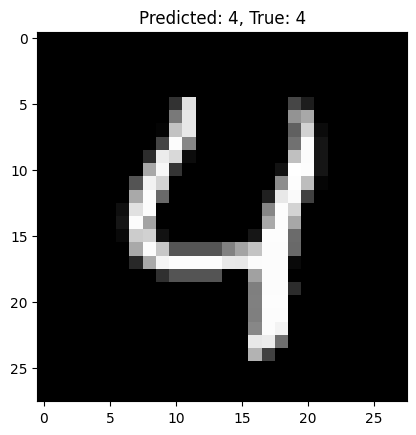

In [3]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import matplotlib.pyplot as plt
import numpy as np

# Load & preprocess data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train[..., np.newaxis] / 255.0, x_test[..., np.newaxis] / 255.0

# Model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile & train
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5, validation_split=0.1)

# Evaluate
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Accuracy:", test_acc)

# Visualize predictions
predictions = model.predict(x_test[:5])
for i in range(5):
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {np.argmax(predictions[i])}, True: {y_test[i]}")
    plt.show()


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Set random seed
tf.random.set_seed(42)
np.random.seed(42)

class CIFAR10CNNClassifier:
    def __init__(self):
        self.model = None
        self.history = None
        self.x_train = None
        self.y_train = None
        self.x_test = None
        self.y_test = None
        self.class_names = [
            'airplane', 'automobile', 'bird', 'cat', 'deer',
            'dog', 'frog', 'horse', 'ship', 'truck'
        ]

    def load_and_preprocess_data(self):
        """Load and preprocess CIFAR-10 dataset"""
        print("Loading CIFAR-10 dataset...")
        (x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

        # Normalize pixel values to [0, 1]
        x_train = x_train.astype('float32') / 255.0
        x_test = x_test.astype('float32') / 255.0

        # One-hot encode labels
        y_train = keras.utils.to_categorical(y_train, 10)
        y_test = keras.utils.to_categorical(y_test, 10)

        self.x_train, self.y_train = x_train, y_train
        self.x_test, self.y_test = x_test, y_test

        print(f"Train shape: {x_train.shape}, Test shape: {x_test.shape}")
        print("Data preprocessed successfully!")

    def build_model(self):
        """Build the CNN model architecture"""
        model = keras.Sequential([
            # Block 1
            layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
            layers.BatchNormalization(),
            layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
            layers.MaxPooling2D((2, 2)),
            layers.Dropout(0.25),

            # Block 2
            layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
            layers.BatchNormalization(),
            layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
            layers.MaxPooling2D((2, 2)),
            layers.Dropout(0.25),

            # Block 3
            layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
            layers.BatchNormalization(),
            layers.Dropout(0.25),

            # Dense Layers
            layers.Flatten(),
            layers.Dense(512, activation='relu'),
            layers.BatchNormalization(),
            layers.Dropout(0.5),
            layers.Dense(10, activation='softmax')
        ])
        self.model = model
        print("Model built successfully!")

    def compile_model(self):
        """Compile the CNN model"""
        self.model.compile(
            optimizer=keras.optimizers.Adam(learning_rate=0.001),
            loss='categorical_crossentropy',
            metrics=['accuracy']
        )
        print("Model compiled.")

    def train_model(self, epochs=25, batch_size=64, validation_split=0.1):
        """Train the model with callbacks"""
        print("Starting training...")
        callbacks = [
            keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True),
            keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=0.0001)
        ]

        self.history = self.model.fit(
            self.x_train, self.y_train,
            epochs=epochs,
            batch_size=batch_size,
            validation_split=validation_split,
            callbacks=callbacks,
            verbose=1
        )

    def evaluate_model(self):
        """Evaluate model performance on test data"""
        print("Evaluating model...")
        test_loss, test_acc = self.model.evaluate(self.x_test, self.y_test, verbose=0)
        print(f"Test Accuracy: {test_acc:.4f} | Loss: {test_loss:.4f}")

        # Classification report
        y_pred = np.argmax(self.model.predict(self.x_test), axis=1)
        y_true = np.argmax(self.y_test, axis=1)
        print("\nClassification Report:")
        print(classification_report(y_true, y_pred, target_names=self.class_names))

    def plot_history(self):
        """Plot training and validation metrics"""
        if not self.history:
            print("No training history found.")
            return

        plt.figure(figsize=(12, 4))

        # Accuracy
        plt.subplot(1, 2, 1)
        plt.plot(self.history.history['accuracy'], label='Train Acc')
        plt.plot(self.history.history['val_accuracy'], label='Val Acc')
        plt.title("Accuracy")
        plt.xlabel("Epochs")
        plt.ylabel("Accuracy")
        plt.legend()

        # Loss
        plt.subplot(1, 2, 2)
        plt.plot(self.history.history['loss'], label='Train Loss')
        plt.plot(self.history.history['val_loss'], label='Val Loss')
        plt.title("Loss")
        plt.xlabel("Epochs")
        plt.ylabel("Loss")
        plt.legend()

        plt.tight_layout()
        plt.show()

    def show_sample_predictions(self, num_samples=5):
        """Visualize predictions on sample test images"""
        indices = np.random.choice(len(self.x_test), num_samples, replace=False)
        x_sample = self.x_test[indices]
        y_true = np.argmax(self.y_test[indices], axis=1)
        y_pred_probs = self.model.predict(x_sample)
        y_pred = np.argmax(y_pred_probs, axis=1)

        plt.figure(figsize=(15, 3))
        for i in range(num_samples):
            plt.subplot(1, num_samples, i + 1)
            plt.imshow(x_sample[i])
            plt.title(f"True: {self.class_names[y_true[i]]}\nPred: {self.class_names[y_pred[i]]}",
                      color='green' if y_true[i] == y_pred[i] else 'red')
            plt.axis('off')
        plt.tight_layout()
        plt.show()

    def plot_confusion_matrix(self):
        """Plot confusion matrix"""
        y_pred = np.argmax(self.model.predict(self.x_test), axis=1)
        y_true = np.argmax(self.y_test, axis=1)
        cm = confusion_matrix(y_true, y_pred)

        plt.figure(figsize=(10, 8))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                    xticklabels=self.class_names,
                    yticklabels=self.class_names)
        plt.title("Confusion Matrix")
        plt.xlabel("Predicted")
        plt.ylabel("True")
        plt.show()

def main():
    print("="*60)
    print("CIFAR-10 IMAGE CLASSIFIER")
    print("="*60)

    clf = CIFAR10CNNClassifier()
    clf.load_and_preprocess_data()
    clf.build_model()
    clf.compile_model()
    clf.train_model(epochs=25, batch_size=64)
    clf.plot_history()
    clf.evaluate_model()
    clf.show_sample_predictions(num_samples=5)
    clf.plot_confusion_matrix()

    print("="*60)
    print("CLASSIFICATION COMPLETE")
    print("="*60)

if __name__ == "__main__":
    main()


CIFAR-10 IMAGE CLASSIFIER
Loading CIFAR-10 dataset...
170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 90s 1us/step
Train shape: (50000, 32, 32, 3), Test shape: (10000, 32, 32, 3)
Data preprocessed successfully!


c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model built successfully!
Model compiled.
Starting training...
Epoch 1/25
704/704 ━━━━━━━━━━━━━━━━━━━━ 220s 301ms/step - accuracy: 0.3686 - loss: 2.0628 - val_accuracy: 0.5248 - val_loss: 1.3964 - learning_rate: 0.0010
Epoch 2/25
704/704 ━━━━━━━━━━━━━━━━━━━━ 232s 330ms/step - accuracy: 0.5922 - loss: 1.1566 - val_accuracy: 0.6434 - val_loss: 1.0919 - learning_rate: 0.0010
Epoch 3/25
704/704 ━━━━━━━━━━━━━━━━━━━━ 210s 298ms/step - accuracy: 0.6680 - loss: 0.9248 - val_accuracy: 0.7076 - val_loss: 0.8417 - learning_rate: 0.0010
Epoch 4/25
704/704 ━━━━━━━━━━━━━━━━━━━━ 187s 266ms/step - accuracy: 0.7117 - loss: 0.8184 - val_accuracy: 0.7198 - val_loss: 0.8205 - learning_rate: 0.0010
Epoch 5/25
704/704 ━━━━━━━━━━━━━━━━━━━━ 189s 268ms/step - accuracy: 0.7392 - loss: 0.7379 - val_accuracy: 0.7342 - val_loss: 0.7965 - learning_rate: 0.0010
Epoch 6/25
704/704 ━━━━━━━━━━━━━━━━━━━━ 175s 248ms/step - accuracy: 0.7655 - loss: 0.6615 - val_accuracy: 0.7480 - val_loss: 0.7451 - learning_rate: 0.0010
E